# Análise exploratória
# Variáveis avaliadas: preço, name e date

In [1]:
import pandas as pd

dados = pd.read_csv('../data/processed/train_data_prep02.csv')


In [2]:
dados.head()

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,date,stock,item_description
0,mlb cincinnati reds t shirt size xl,Men,Tops,T-shirts,3,No Brand,10.0,1,18-6-2018,27,no description yet
1,razer blackwidow chroma keyboard,Electronics,Computers & Tablets,Components & Parts,3,Razer,52.0,0,18-3-2018,15,this keyboard is in great condition and works ...
2,ava viv blouse,Women,Tops & Blouses,Blouse,1,Target,10.0,1,26-10-2018,14,adorable top with a hint of lace and a key hol...
3,leather horse statues,Home,Home Décor,Home Décor Accents,1,No Brand,35.0,1,21-2-2018,1,new with tags leather horses retail for each s...
4,24k gold plated rose,Women,Jewelry,Necklaces,1,No Brand,44.0,0,17-4-2018,13,complete with certificate of authenticity


Análise da coluna `nome`

In [3]:
qtd_itens_unicos = dados.name.nunique()
qtd_registros = len(dados)
porcetagem_registros_unicos = 100 * qtd_itens_unicos / qtd_registros

print('Quantidade de registros do dataset: ', qtd_registros)
print('Quantidade de itens únicos: ', qtd_itens_unicos)
print('Porcentagem de itens únicos em relação ao total de registros: ', porcetagem_registros_unicos, '%')

Quantidade de registros do dataset:  1481661
Quantidade de itens únicos:  1081584
Porcentagem de itens únicos em relação ao total de registros:  72.99807445832751 %


Top 10 itens que mais aparecem no dataset

In [4]:
dados.name.value_counts().head(10)

bundle                  3455
lularoe tc leggings     1146
reserved                 942
lularoe os leggings      913
miss me jeans            755
on hold                  737
coach purse              715
american eagle jeans     692
michael kors purse       569
converse                 496
Name: name, dtype: int64

Overview do produto mais comum do dataset `bundle`

In [5]:
dados.query('name == "bundle"')

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,date,stock,item_description
122,bundle,No category,No category,No category,3,No Brand,59.0,0,27-9-2018,25,sizes and info of clothes can be found on thei...
290,bundle,Other,Other,Other,1,No Brand,81.0,0,2-9-2018,8,discounted price
932,bundle,Women,Sweaters,Poncho,1,No Brand,26.0,0,7-5-2018,13,1pc oversize turtle neck plaid poncho cape 1pc...
1053,bundle,Electronics,Video Games & Consoles,Games,3,Nintendo,22.0,1,24-1-2018,24,minor play scratches played with condition thanks
2157,bundle,Women,Skirts,"Straight, Pencil",2,No Brand,36.0,1,1-4-2018,21,no description yet
...,...,...,...,...,...,...,...,...,...,...,...
1479996,bundle,Women,Swimwear,Two-Piece,2,No Brand,55.0,1,10-8-2018,41,this necklace is stunning in person it has a n...
1480466,bundle,Women,Dresses,Knee-Length,3,No Brand,59.0,0,3-12-2018,11,months this has a quilted teddy bear on front
1481519,bundle,Women,Jewelry,Necklaces,1,No Brand,8.0,0,30-5-2018,1,NaN
1481584,bundle,Women,Dresses,"Above Knee, Mini",3,No Brand,11.0,1,5-9-2018,37,NaN


Análise das colunas de categorias

Frequências das categorias principais dos produtos.

In [6]:
dados.category_1.value_counts(normalize=True)

Women                     0.448139
Beauty                    0.140197
Kids                      0.115786
Electronics               0.082767
Men                       0.063178
Home                      0.045780
Vintage & Collectibles    0.031397
Other                     0.030593
Handmade                  0.020811
Sports & Outdoors         0.017090
No category               0.004261
Name: category_1, dtype: float64

Quantidade de categorias únicas na primeira sub-categoria dos anúncios.

In [7]:
dados.category_2.nunique()

114

Frequência das 10 principais categorias em `category_2`

In [8]:
dados.category_2.value_counts(normalize=True).head(10)

Athletic Apparel             0.090656
Makeup                       0.084073
Tops & Blouses               0.072143
Shoes                        0.067751
Jewelry                      0.041663
Toys                         0.039223
Cell Phones & Accessories    0.035955
Women's Handbags             0.030930
Dresses                      0.030864
Women's Accessories          0.028567
Name: category_2, dtype: float64

Quantidade de categorias em `category_3`

In [9]:
dados.category_3.nunique()

871

Frequência das 10 categorias mais frequentes em `category_3`

In [10]:
dados.category_3.value_counts(normalize=True).head(10)

Pants, Tights, Leggings    0.040598
Other                      0.033880
Face                       0.033844
T-Shirts                   0.031282
Shoes                      0.021691
Games                      0.020851
Lips                       0.020829
Athletic                   0.018248
Eyes                       0.017562
Cases, Covers & Skins      0.016649
Name: category_3, dtype: float64

Descrição dos preços dos produtos de acordo com a `category_1`

In [11]:
dados.groupby('category_1')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
category_1,,,,,,,,
Beauty,207725.0,19.681290,21.360937,3.0,10.0,15.0,24.0,2000.0
Electronics,122632.0,35.190558,65.430780,3.0,9.0,15.0,31.0,1909.0
Handmade,30835.0,18.160694,27.760091,3.0,6.0,12.0,20.0,1750.0
Home,67831.0,24.551068,24.416986,3.0,12.0,18.0,29.0,848.0
Kids,171555.0,20.658439,22.732427,3.0,10.0,14.0,24.0,809.0
Men,93609.0,34.734940,41.244610,3.0,14.0,21.0,40.0,1309.0
No category,6314.0,25.446943,34.130040,3.0,10.0,16.5,28.0,1000.0
Other,45329.0,20.819917,29.851479,3.0,9.0,14.0,23.0,1400.0
Sports & Outdoors,25322.0,25.552385,29.305013,3.0,11.0,16.0,28.0,915.0


Análise dos preços

In [12]:
dados.price.describe().round(2)

count    1481661.00
mean          26.75
std           38.59
min            3.00
25%           10.00
50%           17.00
75%           29.00
max         2009.00
Name: price, dtype: float64

Análise dos preços em função da data do anúncio.

Passando a coluna date para o tipo de `datetime`

In [13]:
dados.date = pd.to_datetime(dados.date, dayfirst=True)

<AxesSubplot:xlabel='date', ylabel='price'>

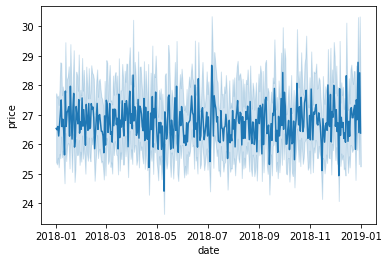

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.lineplot(data=dados, x='date', y='price')

Existe bastante ruído na série. Não se observa um sinal de tendência na série seria necessário investigar se existe algum padrão de sazonalidade. Mas, a príncipio, os valores aparentam ser puramente randomicos.

Definição da coluna `date` como índice do DataFrame.

In [21]:
dados.index = dados.date
dados.drop('date', axis=1, inplace=True)
dados.head()

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,stock,item_description
date,,,,,,,,,,
2018-06-18,mlb cincinnati reds t shirt size xl,Men,Tops,T-shirts,3,No Brand,10.0,1,27,no description yet
2018-03-18,razer blackwidow chroma keyboard,Electronics,Computers & Tablets,Components & Parts,3,Razer,52.0,0,15,this keyboard is in great condition and works ...
2018-10-26,ava viv blouse,Women,Tops & Blouses,Blouse,1,Target,10.0,1,14,adorable top with a hint of lace and a key hol...
2018-02-21,leather horse statues,Home,Home Décor,Home Décor Accents,1,No Brand,35.0,1,1,new with tags leather horses retail for each s...
2018-04-17,24k gold plated rose,Women,Jewelry,Necklaces,1,No Brand,44.0,0,13,complete with certificate of authenticity


Média mensal de preços da categoria `Women`, que é a com maior quantidade de anúncios.

(0.0, 30.0)

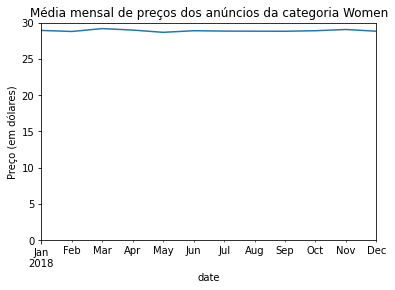

In [23]:
produtos_femininos = dados.query('category_1 == "Women"')

produtos_femininos.resample('M').mean().price.plot()
plt.title('Média mensal de preços dos anúncios da categoria Women')
plt.ylabel('Preço (em dólares)')
plt.ylim(0, 30)

Mesmo que o anterior mas para a categoria Beauty.

(0.0, 30.0)

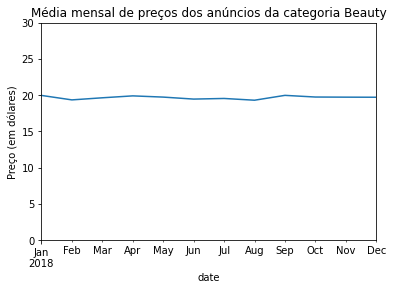

In [29]:
produtos_beleza = dados.query('category_1 == "Beauty"')

produtos_beleza.resample('M').mean().price.plot()
plt.title('Média mensal de preços dos anúncios da categoria Beauty')
plt.ylabel('Preço (em dólares)')
plt.ylim(0, 30)

Mesmo que o anterior mas para a categoria Kids.

(0.0, 30.0)

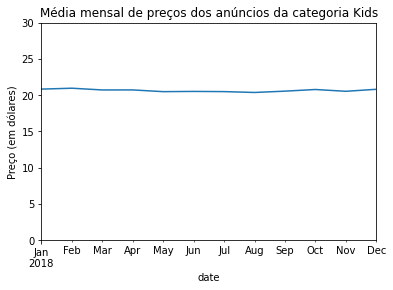

In [34]:
produtos_infantis = dados.query('category_1 == "Kids"')

produtos_infantis.resample('M').mean().price.plot()
plt.title('Média mensal de preços dos anúncios da categoria Kids')
plt.ylabel('Preço (em dólares)')
plt.ylim(0, 30)

Não se observam variações significativas dos preços em função do mês de anúncio.

Série diária de preços para a categoria Kids.

(0.0, 2500.0)

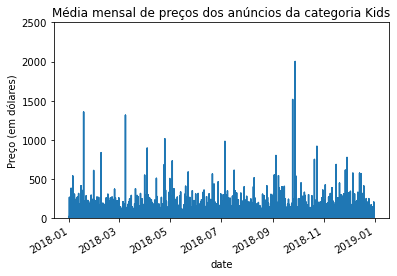

In [38]:
produtos_infantis = dados.query('category_1 == "Kids"')

produtos_beleza.price.plot()
plt.title('Média mensal de preços dos anúncios da categoria Kids')
plt.ylabel('Preço (em dólares)')
plt.ylim(0, 2500)

A série apresenta alguns picos mas nada que indique dependencia temporal dos preços os anúncios.